Web scrapping to get Dataset

In [5]:
import requests
from bs4 import BeautifulSoup
import csv

base='https://books.toscrape.com/catalogue/category/books/{}/index.html'
l=['travel_2','mystery_3','historical-fiction_4','sequential-art_5','classics_6','philosophy_7','womens-fiction_9',
   'fiction_10','childrens_11','religion_12','nonfiction_13']

with open('C:\\Users\\raji\\Documents\\dataset.csv', mode='w',encoding='utf-8', newline='') as file:
  writer = csv.writer(file)
  writer.writerow(['Book Category','Book Name', 'Rating', 'Price'])
  for i in l:
   response = requests.get(base.format(i))
   soup = BeautifulSoup(response.text, 'html.parser')
   category=i.split('_')[0]
   title = soup.find('title')
   course_name = title.get_text().strip().split('|')[0].strip()
   file_name = course_name + '.csv'
   # print(file_name)
   travel_books = soup.find_all('article',  attrs = {'class':'product_pod'})
   # print(travel_books)

   for book in travel_books:
        travel_book_name = book.find('h3').get_text().strip()

        rates = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
        travel_book_rating = rates[book.find('p', attrs={'class': 'star-rating'}).get('class')[1]]

        travel_book_price = book.find('div', attrs={'class': 'product_price'}).find('p', {'class': "price_color"})
        travel_book_price = float(travel_book_price.get_text().split('Â£')[1])

        writer.writerow([category,travel_book_name, travel_book_rating, travel_book_price])

In [6]:
import pandas as pd
df=pd.read_csv("C:\\Users\\raji\\Documents\\data.csv")
print(df)

    Book Category                           Book Name  Rating  Price
0          travel             It's Only the Himalayas       2  45.17
1          travel         Full Moon over Noahâs ...       4  49.43
2          travel      See America: A Celebration ...       3  48.87
3          travel  Vagabonding: An Uncommon Guide ...       2  36.94
4          travel                Under the Tuscan Sun       3  37.33
..            ...                                 ...     ...    ...
180    nonfiction               The Power of Now: ...       2  43.54
181    nonfiction       The Omnivore's Dilemma: A ...       2  38.21
182    nonfiction                 The Genius of Birds       1  17.24
183    nonfiction             The Artist's Way: A ...       5  38.49
184    nonfiction         So You've Been Publicly ...       2  12.23

[185 rows x 4 columns]


In [7]:
df['Price'] = df['Price'].astype(int)
df['Rating'] = df['Rating'].astype(int)
df.drop('Book Name',axis='columns',inplace=True)
print(df.head())

  Book Category  Rating  Price
0        travel       2     45
1        travel       4     49
2        travel       3     48
3        travel       2     36
4        travel       3     37


Data visualization

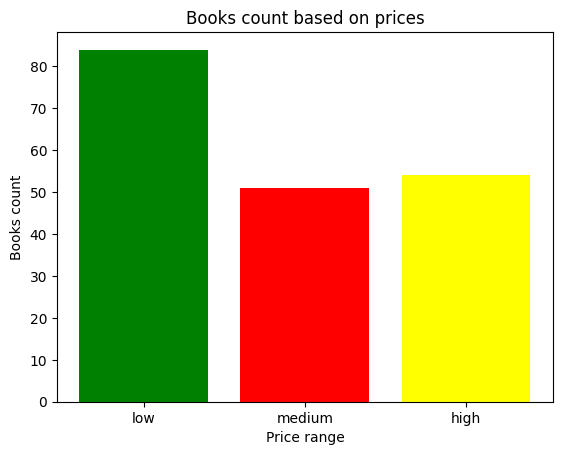

In [9]:
import matplotlib.pyplot as plt
low=sum(1 for p in df['Price'] if p<=30)
medium=sum(1 for p in df['Price'] if p>=30 and p<=45)
high=sum(1 for p in df['Price'] if p>45)
cat=['low','medium','high']
count=[low,medium,high,]
colors=['green','red','yellow']
plt.bar(cat,count,color=colors)
plt.title('Books count based on prices')
plt.xlabel('Price range')
plt.ylabel('Books count')
plt.show()

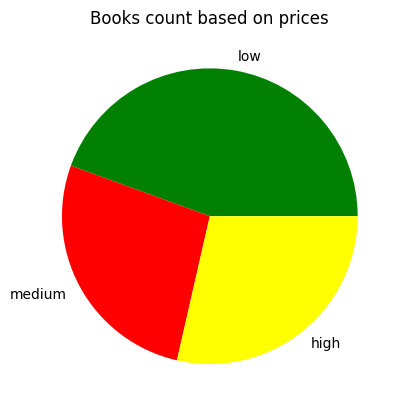

In [12]:
plt.pie(count,labels=cat,colors=colors)
plt.title('Books count based on prices')
plt.show()

Data visualization by power BI

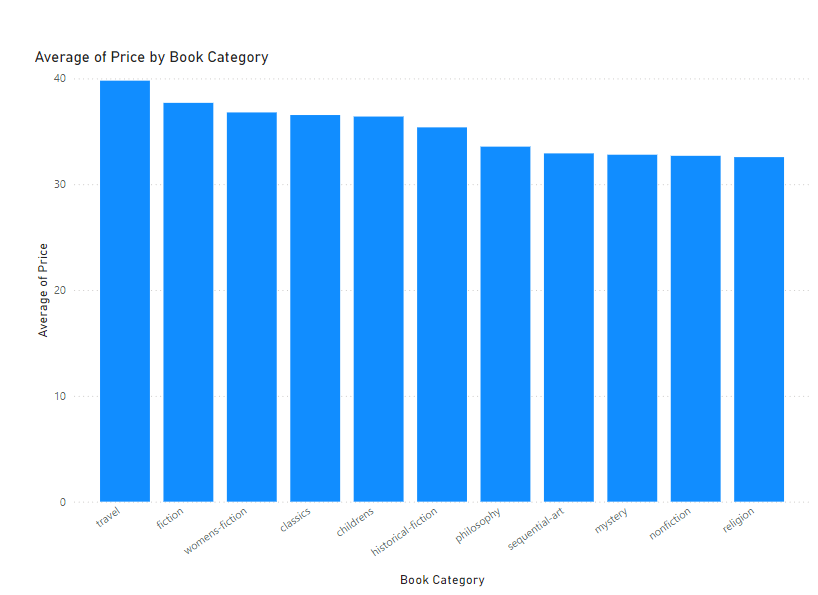

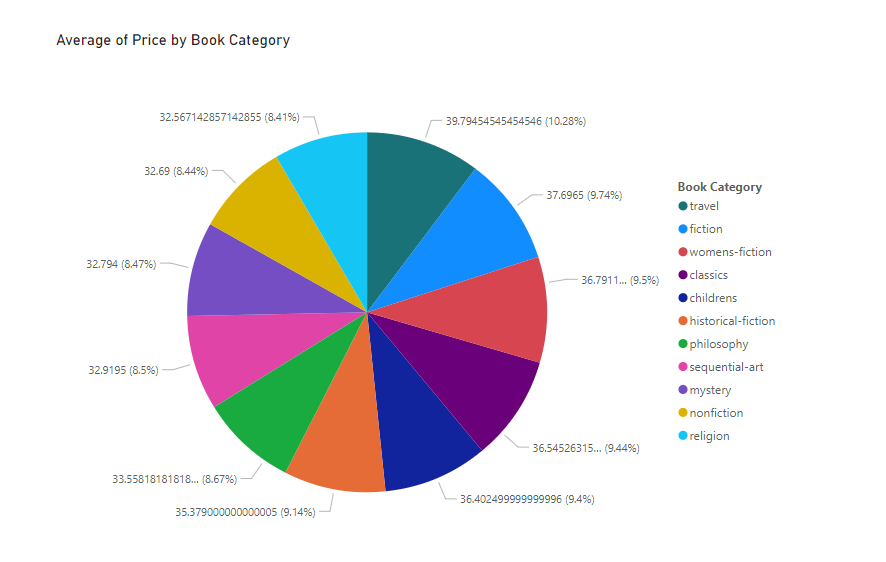

Data preprocessing

In [8]:
import pandas as pd
df = pd.read_csv("C:\\Users\\raji\\Documents\\data.csv")
print(df)

    Book Category                           Book Name  Rating  Price
0          travel             It's Only the Himalayas       2  45.17
1          travel         Full Moon over Noahâs ...       4  49.43
2          travel      See America: A Celebration ...       3  48.87
3          travel  Vagabonding: An Uncommon Guide ...       2  36.94
4          travel                Under the Tuscan Sun       3  37.33
..            ...                                 ...     ...    ...
180    nonfiction               The Power of Now: ...       2  43.54
181    nonfiction       The Omnivore's Dilemma: A ...       2  38.21
182    nonfiction                 The Genius of Birds       1  17.24
183    nonfiction             The Artist's Way: A ...       5  38.49
184    nonfiction         So You've Been Publicly ...       2  12.23

[185 rows x 4 columns]


In [70]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
encoder = LabelEncoder()
df['Book Category'] = encoder.fit_transform(df['Book Category'])
df['Price'] = df['Price'].astype(int)
x = df.drop(['Book Name','Price'],axis=1)
y = df['Price']
print(x)
print(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

     Book Category  Rating
0                9       2
1                9       4
2                9       3
3                9       2
4                9       3
..             ...     ...
180              5       2
181              5       2
182              5       1
183              5       5
184              5       2

[185 rows x 2 columns]
0      45
1      49
2      48
3      36
4      37
       ..
180    43
181    38
182    17
183    38
184    12
Name: Price, Length: 185, dtype: int64


Model building

In [52]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
model1.fit(x_train,y_train)
ypredict=model1.predict(x_test)
score1=model1.score(x_test,y_test)
print(f"model_1 score is {score1}")

model_1 score is 0.13513513513513514


In [68]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)
ypredict=model2.predict(x_test)
score2=model2.score(x_test,y_test)
print(f"model_2 score is {score2}")

model_2 score is 0.8108108108108109
